In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize

In [7]:
df = pd.read_csv("MCTimeCorrelations.csv")

In [8]:
av_tau_u = np.array(df.mean(axis=0))
av_tau_0 = av_tau_u[0]
new_df = df.mul(df.iloc[:, 0], axis=0)
av_tau_product = np.array(new_df.mean(axis=0))

corr_func = av_tau_product - av_tau_0 * av_tau_u

In [9]:
def model_func(t, A, K, C):
    return A * np.exp(-K * t) + C

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, fit_y, fit_parms):
    A, K, C = fit_parms
    ax.plot(t, fit_y, 'b-',
    label='Fitted Function:\n $y = %0.2f e^{-%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

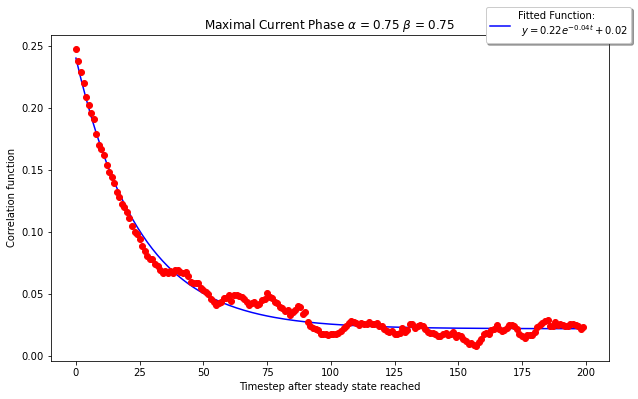

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# Non-linear Fit
t = np.array(range(len(corr_func)))
A, K, C = fit_exp_nonlinear(t, corr_func)
fit_y = model_func(t, A, K, C)
plot(ax, t, corr_func, fit_y, (A, K, C))
ax.set_title('Maximal Current Phase ' + r'$\alpha$ = 0.75 ' + r'$\beta$ = 0.75')
ax.set_xlabel('Timestep after steady state reached')
ax.set_ylabel('Correlation function')

plt.show()

In [16]:
grid_width = 4
left = 0.2
right = 0.8
grid_height = 4
bottom = 0.2
top = 0.8

alphas = np.arange(left, right, 0.2)
betas = np.arange(bottom, top, 0.2)
grid_pts = []
for alpha in alphas:
    for beta in betas:
        grid_pts.append((alpha, beta))
grid_pts

[(0.2, 0.2),
 (0.2, 0.4),
 (0.2, 0.6000000000000001),
 (0.2, 0.8),
 (0.4, 0.2),
 (0.4, 0.4),
 (0.4, 0.6000000000000001),
 (0.4, 0.8),
 (0.6000000000000001, 0.2),
 (0.6000000000000001, 0.4),
 (0.6000000000000001, 0.6000000000000001),
 (0.6000000000000001, 0.8),
 (0.8, 0.2),
 (0.8, 0.4),
 (0.8, 0.6000000000000001),
 (0.8, 0.8)]